In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('ggplot')
sns.set_style('whitegrid')

In [2]:
filename = 'SayoPillow.csv'

In [3]:
df = pd.read_csv(filename)
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


- sr : Snoring Rate
- rr : Respiration Rate
- t : Temperature
- lm : Limb Movement
- bo : Blood Oxygen
- rem : eye movement
- sr : Sleeping Hours
- hr :  Heart Rate
- sl : Stress Level

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


As we see, type of each columns is numerical, except target Columns which is Categorical Type

C:\Users\intel\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\intel\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\intel\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

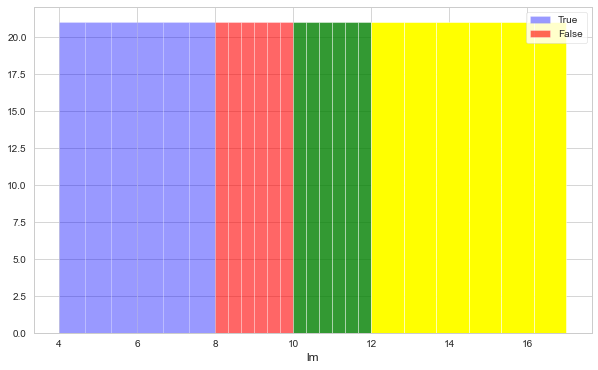

In [11]:
plt.figure(figsize=(10,6))
sns.distplot(df['lm'][df['sl']==0],color="blue", kde=False, hist_kws={"alpha": 0.4})
sns.distplot(df['lm'][df['sl']==1],color="red", kde=False, hist_kws={"alpha":0.6})
sns.distplot(df['lm'][df['sl']==2],color="green", kde=False, hist_kws={"alpha":0.8})
sns.distplot(df['lm'][df['sl']==3],color="yellow", kde=False, hist_kws={"alpha":1})
plt.legend(['True', 'False'])
plt.show()

In [12]:
df.columns

Index(['sr', 'rr', 't', 'lm', 'bo', 'rem', 'sr.1', 'hr', 'sl'], dtype='object')

<AxesSubplot:xlabel='lm', ylabel='rr'>

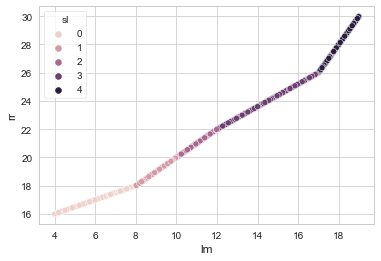

In [17]:
sns.scatterplot(data=df,x="lm",y='rr',hue='sl')

In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [7]:
from sklearn.model_selection import train_test_split


In [8]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=32)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
clf = DecisionTreeClassifier()

In [11]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [12]:
y_pred = clf.predict(x_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9947089947089947


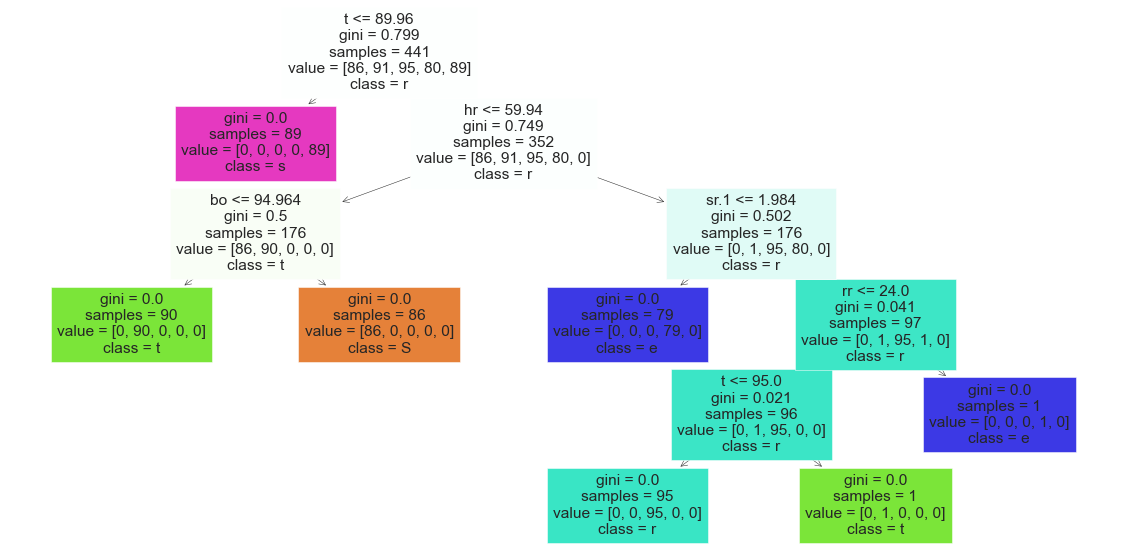

In [15]:
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, 
class_names="Stress Level", filled=True)
plt.show()

In [16]:
from sklearn.neighbors import KNeighborsClassifier as knn

In [17]:
clf2 = knn()

In [18]:
clf2.fit(x_train,y_train)

KNeighborsClassifier()

In [19]:
clf2.predict(x_test)

array([0, 3, 4, 2, 0, 2, 3, 3, 1, 2, 4, 2, 4, 4, 0, 2, 4, 3, 2, 1, 3, 4,
       1, 3, 1, 3, 0, 2, 2, 4, 1, 1, 3, 0, 2, 4, 3, 0, 1, 3, 3, 3, 3, 0,
       0, 0, 0, 1, 1, 3, 4, 4, 0, 1, 3, 4, 1, 1, 3, 0, 2, 2, 4, 3, 1, 0,
       1, 1, 4, 1, 0, 3, 2, 3, 3, 3, 1, 0, 4, 2, 1, 3, 4, 0, 3, 0, 1, 2,
       0, 1, 4, 1, 4, 2, 4, 0, 3, 0, 2, 0, 3, 3, 3, 4, 0, 0, 0, 3, 4, 4,
       3, 1, 4, 2, 2, 3, 4, 0, 2, 1, 2, 3, 3, 0, 4, 2, 4, 0, 1, 3, 3, 4,
       4, 0, 3, 3, 0, 2, 2, 3, 0, 2, 4, 4, 3, 0, 1, 1, 0, 1, 1, 4, 1, 3,
       3, 3, 3, 0, 1, 1, 0, 4, 3, 3, 4, 2, 1, 4, 4, 2, 1, 3, 4, 0, 2, 0,
       2, 2, 4, 0, 0, 2, 2, 3, 0, 1, 1, 4, 0], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9947089947089947


In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix(y_test,y_pred)

array([[40,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0],
       [ 0,  0, 31,  0,  0],
       [ 0,  0,  0, 46,  0],
       [ 0,  0,  0,  1, 36]], dtype=int64)

In [23]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        31
           3       0.98      1.00      0.99        46
           4       1.00      0.97      0.99        37

    accuracy                           0.99       189
   macro avg       1.00      0.99      1.00       189
weighted avg       0.99      0.99      0.99       189

